In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# load data
df = pd.read_csv('/Users/cristianmurillo/Documents/Data scientis /Machine learning models /Data_Sets/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

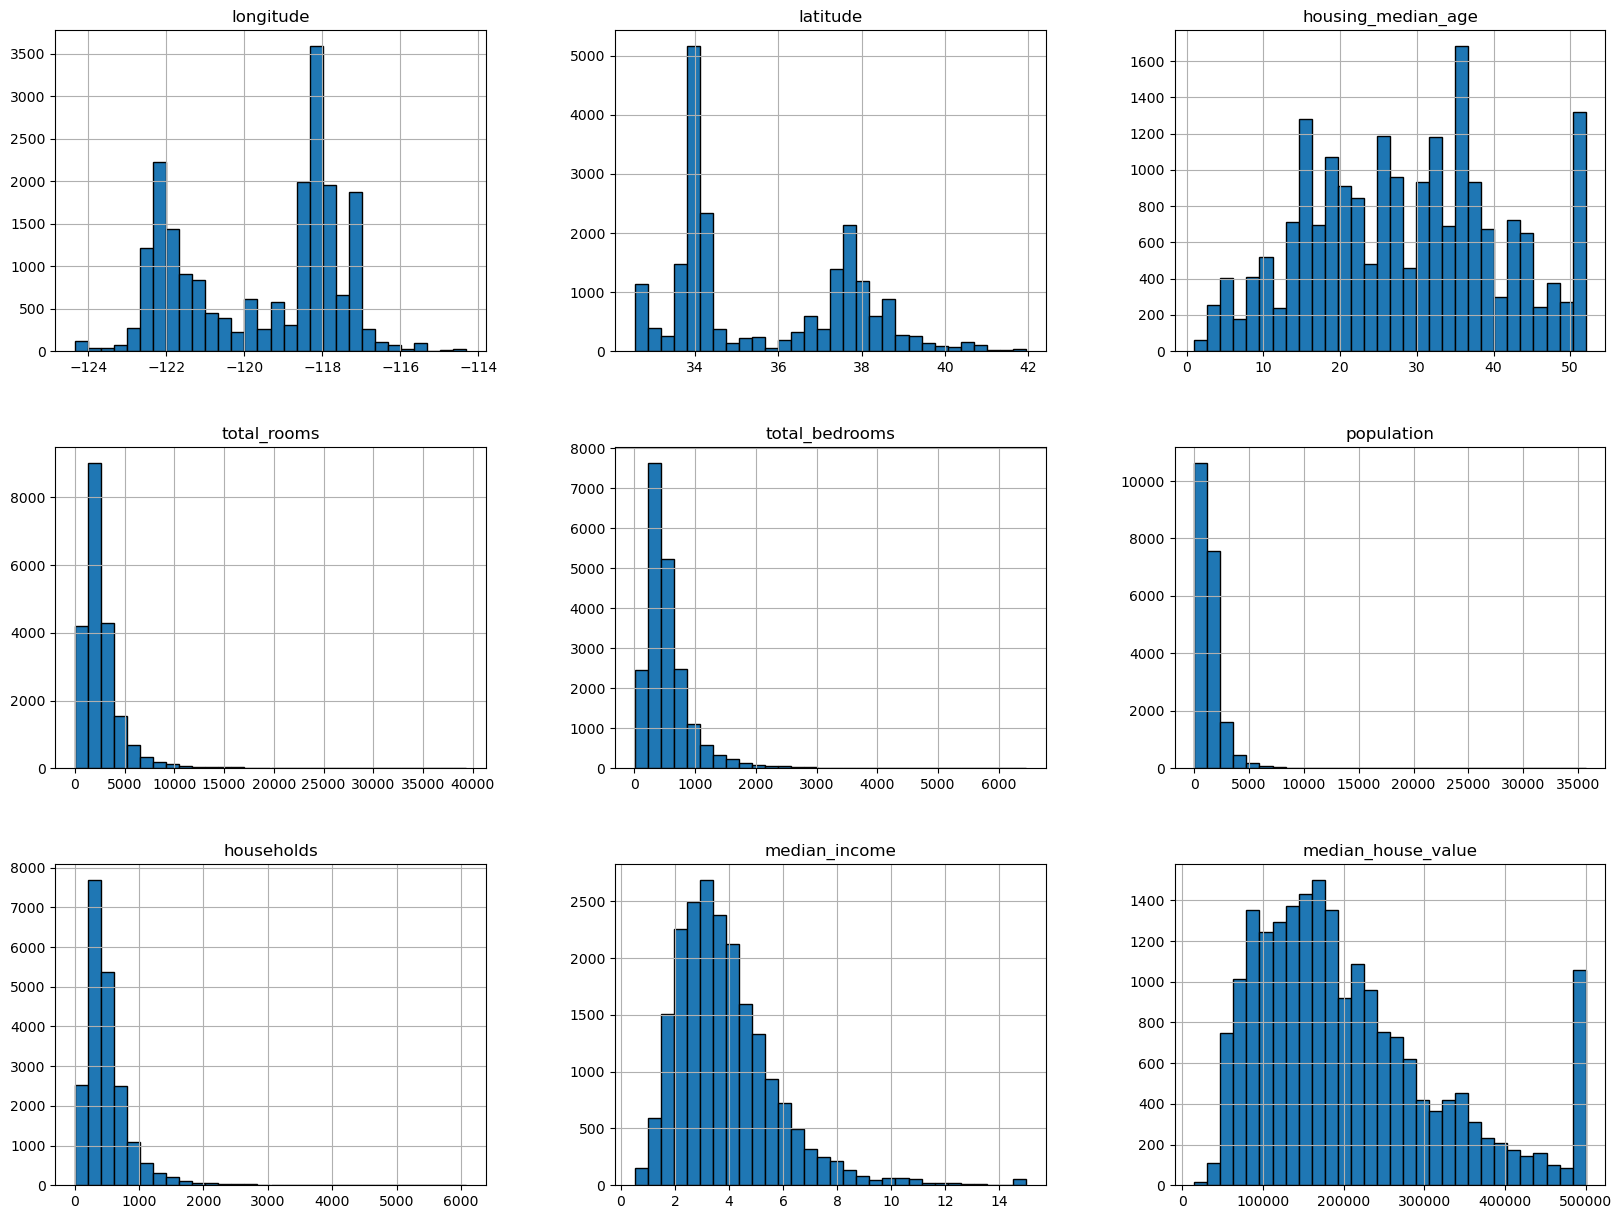

In [7]:
df.hist(bins=30, figsize=(20,15),edgecolor='black')

<Axes: xlabel='longitude', ylabel='latitude'>

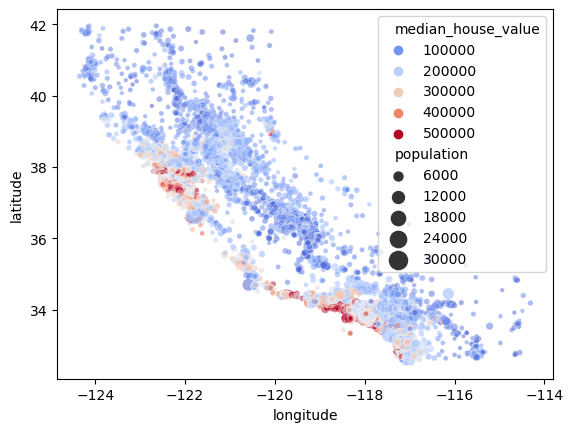

In [8]:
sns.scatterplot(x='longitude', y='latitude', data=df ,hue='median_house_value', palette='coolwarm',size='population',sizes=(10,200),alpha=0.5)

<Axes: xlabel='longitude', ylabel='latitude'>

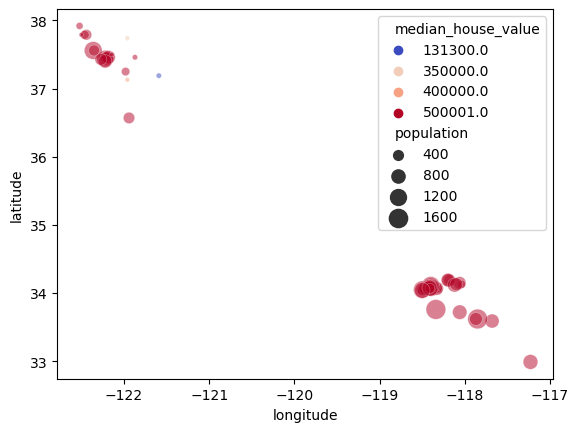

In [9]:
sns.scatterplot(x='longitude', y='latitude', data=df[(df.median_income > 14)] ,hue='median_house_value', palette='coolwarm',size='population',sizes=(10,200),alpha=0.5)

In [10]:
df.dropna(inplace=True,axis=1)

In [11]:
# convert categorical data to numerical data Dummies / One-hot encoding 
df = df.join(pd.get_dummies(df['ocean_proximity'],prefix='ocean',dtype=int))
df = df.drop(['ocean_proximity'],axis=1)

df.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


<Axes: >

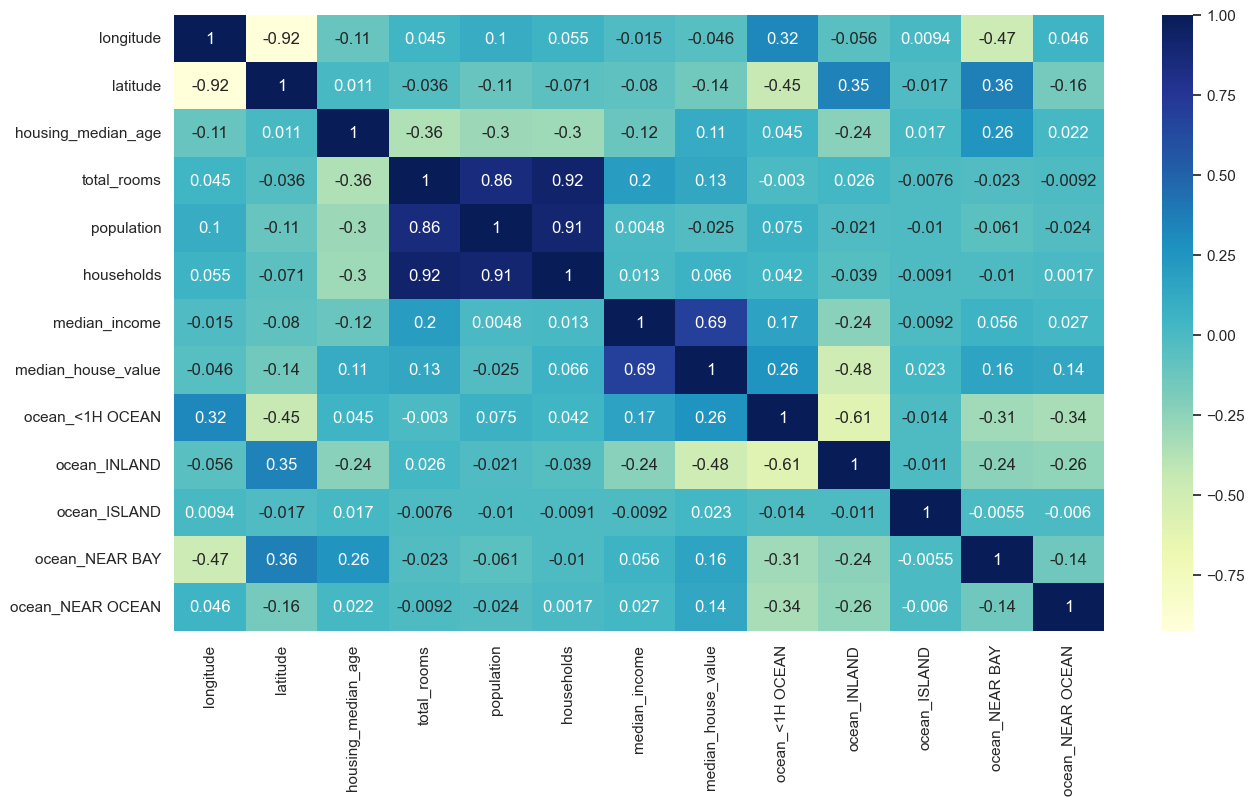

In [12]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [13]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
ocean_<1H OCEAN       0.256617
ocean_NEAR BAY        0.160284
ocean_NEAR OCEAN      0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
ocean_ISLAND          0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
ocean_INLAND         -0.484859
Name: median_house_value, dtype: float64

In [14]:
# split data
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

In [15]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)    

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
compare = pd.DataFrame({'Predicted':model.predict(X_test),'Real':y_test})  
compare.head(10)

,Predicted,Real
16086,321449.241709,406200.0
8816,537196.517559,500001.0
7175,163676.523098,122900.0
16714,246756.875459,209100.0
14491,458317.685345,500001.0
11807,130191.587188,135500.0
19109,230231.415306,194100.0
6926,198099.341303,158100.0
11649,275427.343958,279200.0
11961,277268.216174,193800.0


In [18]:
# overfitting 
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.6503701904695134
0.6246705353830064


In [19]:
# error metrics
print(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))


71267.75479459911


In [20]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [21]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.720503,-0.717043,-0.763911,0.046746,-0.028017,0.522636,-0.692180,1.120754,-0.679635,-0.016641,-0.351775,-0.387237
1,0.291501,-0.170430,0.268592,-0.988914,-1.045758,-1.064217,-1.441867,-0.892256,1.471377,-0.016641,-0.351775,-0.387237
2,0.735468,-0.815154,0.506862,-0.741041,-0.728265,-0.811763,-0.151089,1.120754,-0.679635,-0.016641,-0.351775,-0.387237
3,0.625724,-0.801138,0.506862,-0.611696,-0.633017,-0.814339,0.508646,1.120754,-0.679635,-0.016641,-0.351775,-0.387237
4,-0.566503,1.263846,-1.002181,-0.622512,-0.766188,-0.739634,0.308535,-0.892256,1.471377,-0.016641,-0.351775,-0.387237
...,...,...,...,...,...,...,...,...,...,...,...,...
14443,0.660642,-0.656309,0.427439,-0.097922,-0.172653,-0.118803,0.431636,1.120754,-0.679635,-0.016641,-0.351775,-0.387237
14444,0.735468,-0.833841,0.586286,-0.758167,-0.892303,-0.883893,0.409201,1.120754,-0.679635,-0.016641,-0.351775,-0.387237
14445,-1.090285,0.777968,-1.796414,0.400078,-0.043892,-0.023489,1.206569,1.120754,-0.679635,-0.016641,-0.351775,-0.387237
14446,-1.185064,0.801327,0.586286,-0.814051,-0.778535,-0.744786,-0.312960,1.120754,-0.679635,-0.016641,-0.351775,-0.387237
